# HUDA EMRAN SHQERAT 163547

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif


# Read data and initial review

In [24]:
train_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_df = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())

#Upload CSV files containing data used in training and testing.
#These files contain a collection of records, where each record represents specific data, such as an email message in this case.
#When CSV files are read using pd.read_csv(), this data is converted to a DataFrame in the pandas library.


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00                0.0           1.12           0.0   
1            0.32                0.0           0.64           0.0   
2            0.00                0.0           0.00           0.0   
3            0.19                0.0           0.00           0.0   
4            0.00                0.0           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.56            0.00               0.0                0.00   
1           0.32            0.32               0.0                1.61   
2           0.34            0.00               0.0                0.34   
3           0.00            0.00               0.0                0.00   
4           0.00            0.00               0.0                0.00   

   word_freq_order  word_freq_mail  ...  char_freq_(  char_freq_[  \
0             0.00            0.56  ...        0.101         0.00   
1 

# Spam distribution and link analysis

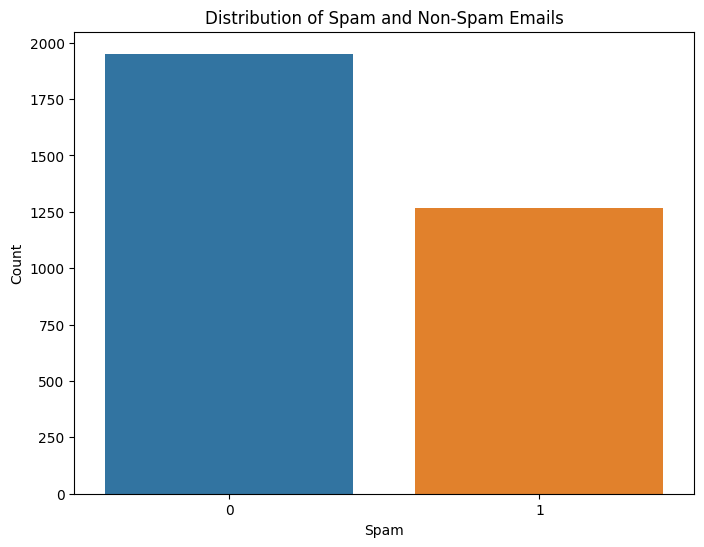

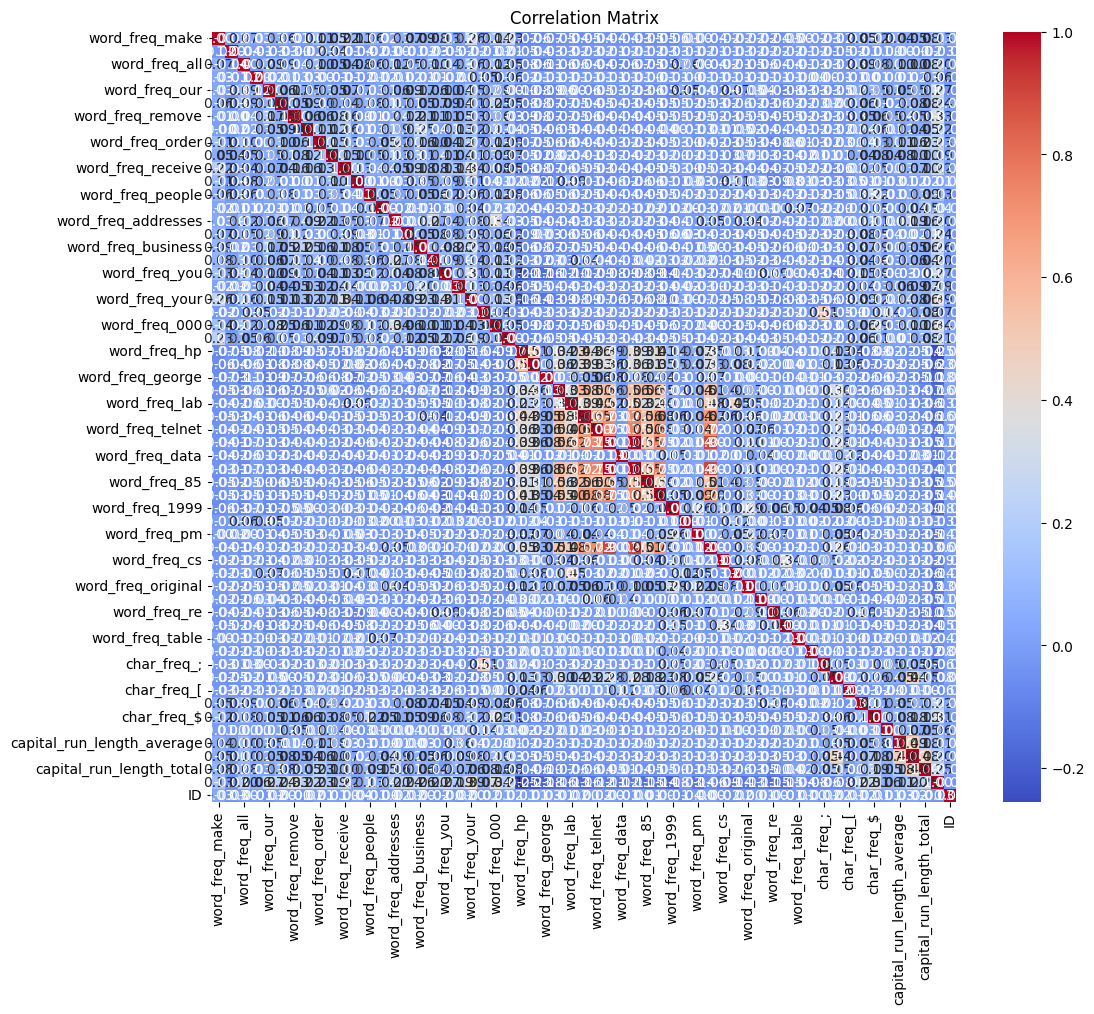

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=train_df)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(12, 10))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#sns.countplot(x='spam', data=train_df): Uses the seaborn library to plot count plot. x='spam' is passed to specify the data we want to display,
#and data=train_df is passed to specify the data we want to use.
# This graph shows the distribution of the number of emails between spam and non-spam messages.

# Data processing

In [27]:
train_df.dropna(inplace=True)

X_train = train_df.drop(columns=['spam', 'ID'])
y_train = train_df['spam']
X_test = test_df.drop(columns=['ID'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

selector = SelectKBest(f_classif, k=30)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

#Eliminate missing data in the training dataset.
#Separate feature variables and target variable from training dataset and testing dataset.
#Convert feature variables to equal scale using standard transformation technique.

# Data partitioning

In [28]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_selected, y_train_resampled, test_size=0.2, random_state=42)
#Training set: contains sample data that will be used to train the model.
#Validation set: contains sample data that will be used to evaluate the performance of the model.
#This division is done randomly and depends on a certain percentage of the data, in this case 80% of the data is used for training and 20% for verification. 
#The specified seed (random_state=42) defines the randomness pattern used in this process to ensure reproducibility

# Optimize parameters using Grid Search

In [42]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Determine a set of possible values for the parameters (hyperparameters) that will be used to initialize and improve the model. 
#In this case, a set of possible values of the parameters is determined which is used to improve the performance of the Random Forest model.توره 

 # Defining models and implementing Grid Search

In [44]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
xgb_model = XGBClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_sub, y_train_sub)
grid_search_gb.fit(X_train_sub, y_train_sub)
grid_search_svm.fit(X_train_sub, y_train_sub)
grid_search_xgb.fit(X_train_sub, y_train_sub)

#It aims to train the five different models (Random Forest, Gradient Boosting, SVM, XGBoost, and LightGBM) using GridSearchCV technology to optimize the parameters. 
#These models are used to classify the available data based on the selected features.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

# Evaluation of models

In [47]:
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_
best_svm_model = grid_search_svm.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

models = {
    "Random Forest": best_rf_model,
    "Gradient Boosting": best_gb_model,
    "SVM": best_svm_model,
    "XGBoost": best_xgb_model,
}

for name, model in models.items():
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy ({name}): {val_accuracy}")
    
#It evaluates the performance of the best models selected by GridSearchCV on the validation subset.
#These models are stored in a dictionary named “models” where the name of each model is identified with the model itself.


Validation Accuracy (Random Forest): 0.9513444302176697
Validation Accuracy (Gradient Boosting): 0.9500640204865557
Validation Accuracy (SVM): 0.9206145966709347
Validation Accuracy (XGBoost): 0.9475032010243278


# Classification report and confusion matrix for each model

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       402
           1       0.95      0.94      0.95       379

    accuracy                           0.95       781
   macro avg       0.95      0.95      0.95       781
weighted avg       0.95      0.95      0.95       781

Confusion Matrix (Random Forest):


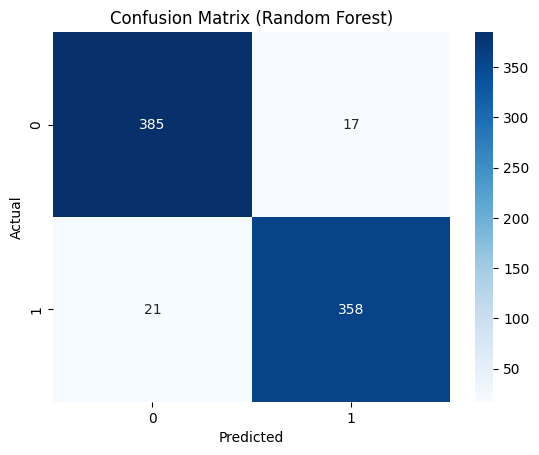

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       402
           1       0.95      0.95      0.95       379

    accuracy                           0.95       781
   macro avg       0.95      0.95      0.95       781
weighted avg       0.95      0.95      0.95       781

Confusion Matrix (Gradient Boosting):


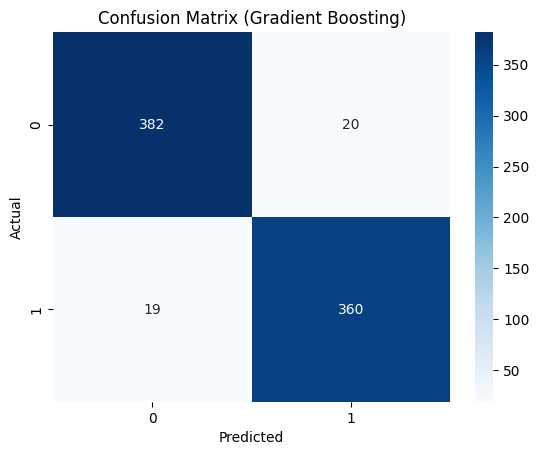

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       402
           1       0.92      0.91      0.92       379

    accuracy                           0.92       781
   macro avg       0.92      0.92      0.92       781
weighted avg       0.92      0.92      0.92       781

Confusion Matrix (SVM):


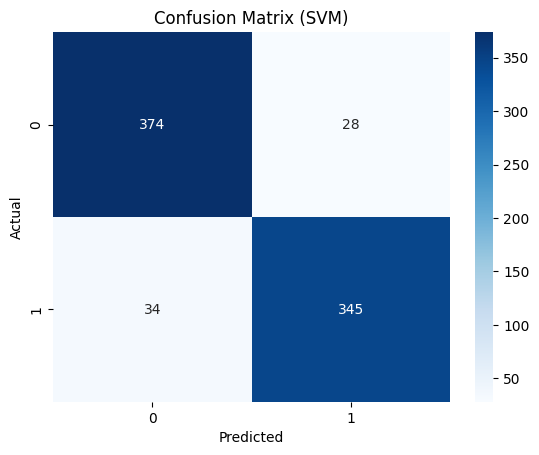

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       402
           1       0.94      0.95      0.95       379

    accuracy                           0.95       781
   macro avg       0.95      0.95      0.95       781
weighted avg       0.95      0.95      0.95       781

Confusion Matrix (XGBoost):


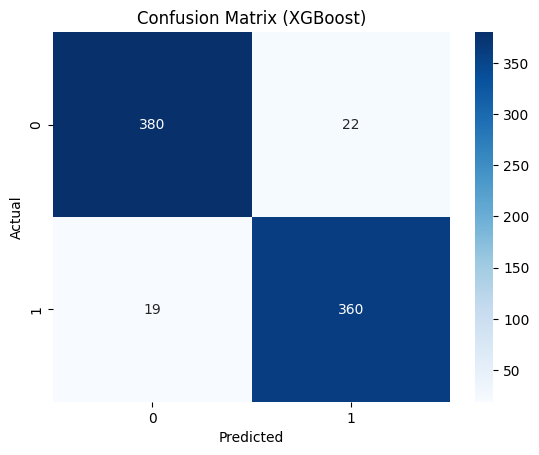

In [48]:
for name, model in models.items():
    y_val_pred = model.predict(X_val)
    print(f"Classification Report ({name}):")
    print(classification_report(y_val, y_val_pred))
    print(f"Confusion Matrix ({name}):")
    sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
#Print the classification report and Confusion Matrix for each of the selected models trained using the validation subset. 
#This is done by using a for loop to go through the "models" dictionary which contains the names of the models and the models themselves.

# VotingClassifier

In [51]:
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('gb', best_gb_model),
    ('svm', best_svm_model),
    ('xgb', best_xgb_model),
], voting='soft')

voting_clf.fit(X_train_selected, y_train_resampled)

y_val_pred_voting = voting_clf.predict(X_val)
val_accuracy_voting = accuracy_score(y_val, y_val_pred_voting)
print("Validation Accuracy (Voting Classifier):", val_accuracy_voting)

#Create an aggregate model using VotingClassifier. 
#This is done by defining a list of already trained models (best_rf_model, best_gb_model, best_svm_model, best_xgb_model, best_lgbm_model) and assigning each model with a specific label.

Validation Accuracy (Voting Classifier): 0.9897567221510883


# Classification report and confusion matrix for VotingClassifier

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       402
           1       0.99      0.98      0.99       379

    accuracy                           0.99       781
   macro avg       0.99      0.99      0.99       781
weighted avg       0.99      0.99      0.99       781

Confusion Matrix (Voting Classifier):


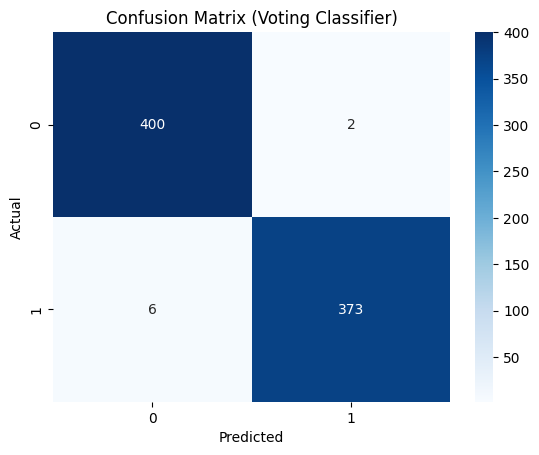

In [52]:
print("Classification Report (Voting Classifier):")
print(classification_report(y_val, y_val_pred_voting))
print("Confusion Matrix (Voting Classifier):")
sns.heatmap(confusion_matrix(y_val, y_val_pred_voting), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Voting Classifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Prints the classification report and confusion matrix for the clustering model created with VotingClassifier.

#The classification_report function prints a detailed report containing information about the performance of the aggregate model on the validation set. The report includes precision, standard deviation, precision, recall, and F1-score value for each category.

#The confusion matrix is then printed to show the number of correct and incorrect classifications made by the clustering model. The confusion matrix is displayed in heatmap form for easier reading, where dark color shows the number of correct classifications and light color shows the number of incorrect classifications.

# Prediction on the test set

In [53]:
y_test_pred = voting_clf.predict(X_test_selected)

submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'spam': y_test_pred 
})

submission_df.to_csv('submission.csv', index=False)

#The ensemble model built with VotingClassifier is used to make a prediction on the test dataset (X_test_selected), and then creates a DataFrame for delivery.

#The data frame is created using the identifiers (ID) from the test dataset and the predictions (y_test_pred) obtained.
